# KMeans Clustering

## This is an UnSuperVised Learning Algorithm. The K-Means Clustering Algorithm is used to cluster unlabelled data into different segments.

## Import System Libraries

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

## Import the Data Handling Libraries

In [2]:
import numpy as np
import pandas as pd

## Importing the Data Visualization Libraries

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the Data

In [4]:
iris = pd.read_csv('Iris.csv')

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### We drop the Species column, so that we are left with an unlabelled dataset, which we can use for clustering algorithms.

In [9]:
iris_data = iris.drop(['Id', 'Species'], axis = 1)

In [10]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## K-Means Clustering

In [14]:
from sklearn.cluster import KMeans

## Elbow Method

### We can use the Elbow method to find the number of clusters in our clustering algorithm.

In [15]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(iris_data)
    wcss.append(kmeans.inertia_)

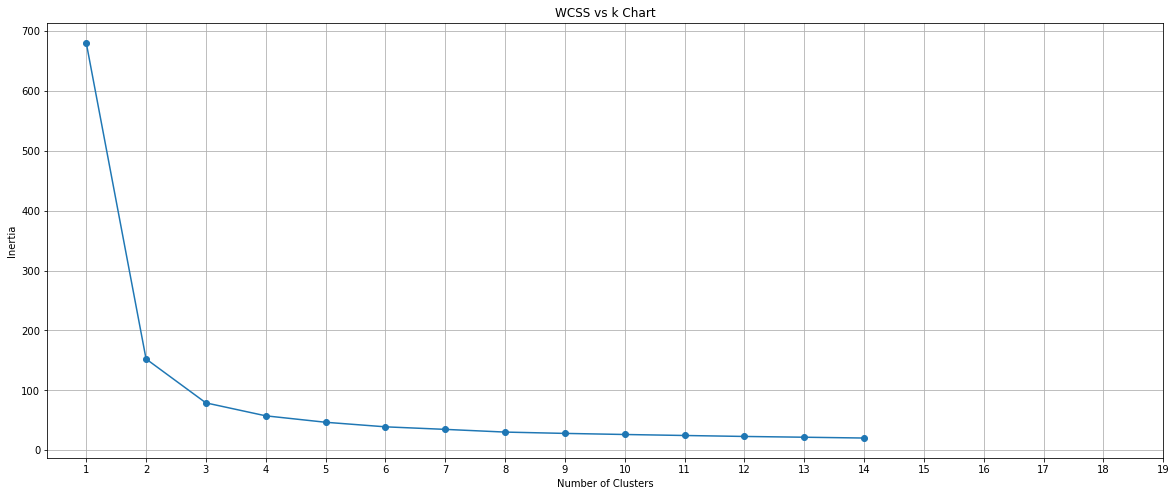

In [18]:
plt.figure(figsize=(20, 8))
plt.title("WCSS vs k Chart")
plt.plot(range(1, 15), wcss, '-o')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 20))
plt.show()

### From the above plot, we find that there is a sharp decline until the 3rd cluster (meaning that we find an elbow shape at the 3rd cluster). After the 3rd cluster, the cost (J) of the algorithm almost flattens out. So, we can choose the k (the number of clusters) as 3.

In [19]:
kmeans = KMeans(n_clusters = 3)

In [20]:
kmeans.fit(iris_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
kmeans_predict = kmeans.predict(iris_data)

In [22]:
kmeans_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [24]:
iris_data = pd.DataFrame(iris_data) # Creating a DataFrame

In [25]:
iris_data["Label"] = kmeans_predict

In [26]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


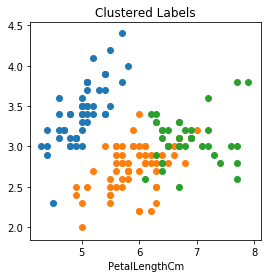

In [28]:
plt.figure(figsize=(24, 4))
plt.subplot(1, 5, 5)
plt.title('Clustered Labels')
plt.xlabel('PetalLengthCm')
plt.scatter(iris_data.SepalLengthCm[iris_data.Label == 0], iris_data.SepalWidthCm[iris_data.Label == 0])
plt.scatter(iris_data.SepalLengthCm[iris_data.Label == 1], iris_data.SepalWidthCm[iris_data.Label == 1])
plt.scatter(iris_data.SepalLengthCm[iris_data.Label == 2], iris_data.SepalWidthCm[iris_data.Label == 2])
plt.show()

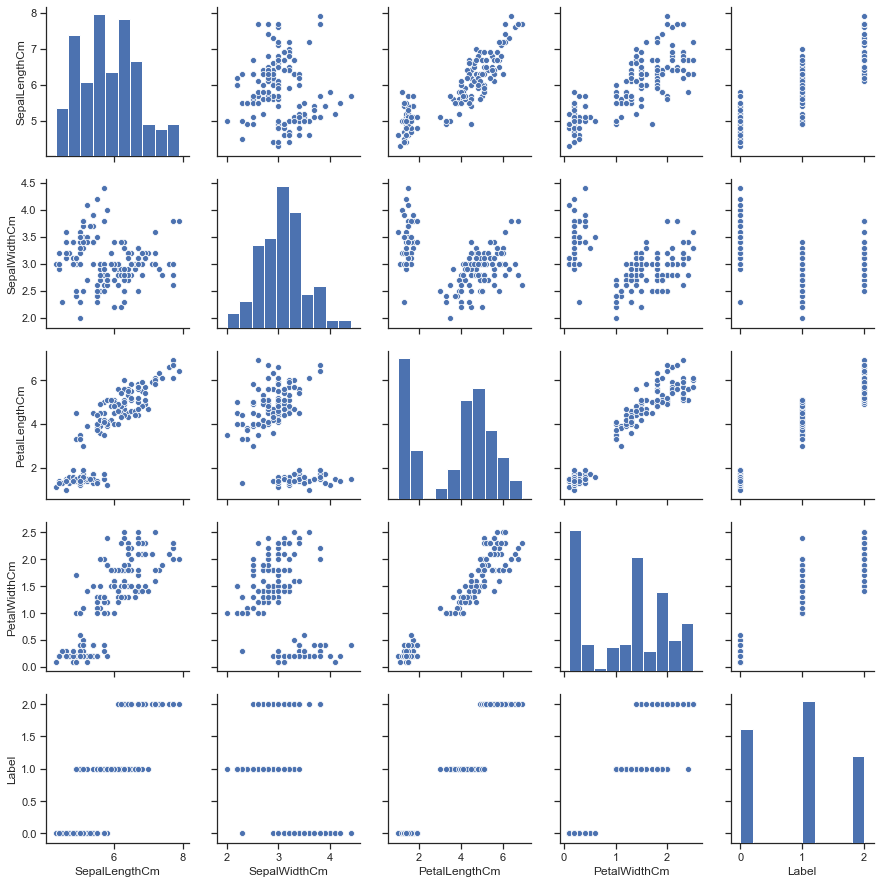

In [39]:
sns.pairplot(data=iris_data, palette='Set2')
plt.show()

### Validation of Cluster

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
kmeans.score(iris_data.iloc[:, :-1]) # To find the score, we select all the columns except the "Label" column

-78.9408414261458

In [44]:
silhouette_score(iris_data, kmeans_predict)

0.6126634972047178

### Assigning Dependent and the Independent Variable

In [45]:
X = iris_data.iloc[:, :-1]
y = iris_data.iloc[:, -1]

### Splitting the data into training set and test set

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## K Nearest Neighbors (KNN)

## The-K Nearest-Neighbors (KNN) is a SuperVised Classification Algorithm

### From the Labels obtained from our Clustering Algorithm, we now run the KNN Algorithm to classify the different types of flowers.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predicting the Variable

In [52]:
y_pred = knn.predict(X_test)

In [53]:
y_pred

array([1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0], dtype=int32)

## Validation of Classification

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
accuracy_score(y_test, y_pred)

1.0

In [56]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  3]], dtype=int64)

In [57]:
knn.score(X_test, y_pred)

1.0

## Replacing the labelled value from numeric to the text format

In [58]:
iris_data["Label"].replace({0: "Setosa", 1: "Versicolor", 2: "Virginica"}, inplace = True)

In [89]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Versicolor
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
